In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

# Load Aaron Judge's Statcast data
judge = pd.read_csv('judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('stanton.csv')

In [2]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher_1,fielder_2_1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
15164,FF,2024-04-07,93.9,-1.92,6.21,"Judge, Aaron",592450,670102,NaN,ball,NaN,NaN,NaN,NaN,12.0,Aaron Judge called out on strikes.,R,R,R,NYY,TOR,B,NaN,NaN,0,0,2024,-0.38,1.81,1.44,3.20,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,672386,NaN,NaN,9.622623,-136.089599,-5.962895,-7.306348,37.012932,-8.603066,3.98,1.79,NaN,NaN,NaN,93.5,2416.0,6.8,745765,670102,672386,665489,643396,676391,666182,662139,595281,624415,53.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,211.0,0.0,0.010
15165,FF,2024-04-07,91.3,-2.08,6.37,"Judge, Aaron",592450,670950,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,Aaron Judge walks. Juan Soto to 2nd.,R,R,R,NYY,TOR,S,NaN,NaN,3,0,2024,-0.68,1.60,-0.07,1.78,NaN,NaN,665742.0,0,7,Bot,NaN,NaN,NaN,NaN,672386,NaN,NaN,6.501373,-132.408068,-8.946264,-9.486020,33.051163,-11.545424,3.98,1.79,NaN,NaN,NaN,90.3,2391.0,6.3,745765,670950,672386,665489,643396,676391,666182,676914,595281,624415,54.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,4,4-Seam Fastball,6,3,6,3,3,6,6,3,Standard,Standard,199.0,0.0,-0.128
15166,CH,2024-04-07,78.7,-2.37,6.39,"Judge, Aaron",592450,670950,NaN,ball,NaN,NaN,NaN,NaN,11.0,Aaron Judge walks. Juan Soto to 2nd.,R,R,R,NYY,TOR,B,NaN,NaN,2,0,2024,-1.45,-0.62,-2.06,3.33,NaN,NaN,665742.0,0,7,Bot,NaN,NaN,NaN,NaN,672386,NaN,NaN,3.363436,-114.574983,1.269618,-13.444404,19.966205,-38.092171,3.98,1.79,NaN,NaN,NaN,78.6,2619.0,6.1,745765,670950,672386,665489,643396,676391,666182,676914,595281,624415,54.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,3,Changeup,6,3,6,3,3,6,6,3,Standard,Standard,271.0,0.0,0.217
15167,FF,2024-04-07,92.6,-2.06,6.46,"Judge, Aaron",592450,670950,NaN,ball,NaN,NaN,NaN,NaN,14.0,Aaron Judge walks. Juan Soto to 2nd.,R,R,R,NYY,TOR,B,NaN,NaN,1,0,2024,-1.00,1.62,0.98,2.75,NaN,NaN,665742.0,0,7,Bot,NaN,NaN,NaN,NaN,672386,NaN,NaN,9.896852,-134.194663,-7.049432,-14.416548,34.731766,-11.200263,3.98,1.79,NaN,NaN,NaN,91.5,2188.0,6.3,745765,670950,672386,665489,643396,676391,666182,676914,595281,624415,54.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,2,4-Seam Fastball,6,3,6,3,3,6,6,3,Standard,Standard,202.0,0.0,0.054
15168,FF,2024-04-07,92.6,-2.14,6.35,"Judge, Aaron",592450,670950,NaN,blocked_ball,NaN,NaN,NaN,NaN,14.0,Aaron Judge walks. Juan Soto to 2nd.,R,R,R,NYY,TOR,B,NaN,NaN,0,0,2024,-1.04,1.88,0.30,0.62,NaN,NaN,665742.0,0,7,Bot,NaN,NaN,NaN,NaN,672386,NaN,NaN,8.437113,-133.898700,-12.732233,-14.445605,32.472774,-6.755029,3.98,1.79,NaN,NaN,NaN,91.4,2338.0,6.2,745765,670950,672386,665489,643396,676391,666182,676914,595281,624415,54.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,1,4-Seam Fastball,6,3,6,3,3,6,6,3,Standard,Standard,203.0,0.0,0.114


In [3]:
# All of Aaron Judge's batted ball events in 2017
judge_events_2017 = judge[judge['game_year'] == 2017]['events']
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017.value_counts())

# All of Giancarlo Stanton's batted ball events in 2017
stanton_events_2017 = stanton[stanton['game_year'] == 2017]['events']
print("\nGiancarlo Stanton batted ball event totals, 2017:")
print(judge_events_2017.value_counts())

Aaron Judge batted ball event totals, 2017:
events
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
hit_by_pitch                   5
fielders_choice_out            4
sac_fly                        4
triple                         3
fielders_choice                2
field_error                    2
strikeout_double_play          1
Name: count, dtype: int64

Giancarlo Stanton batted ball event totals, 2017:
events
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
hit_by_pitch                   5
fielders_choice_out            4
sac_fly                        4
triple 

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

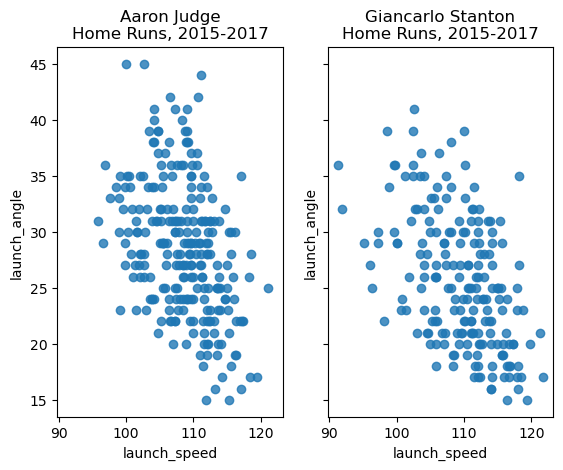

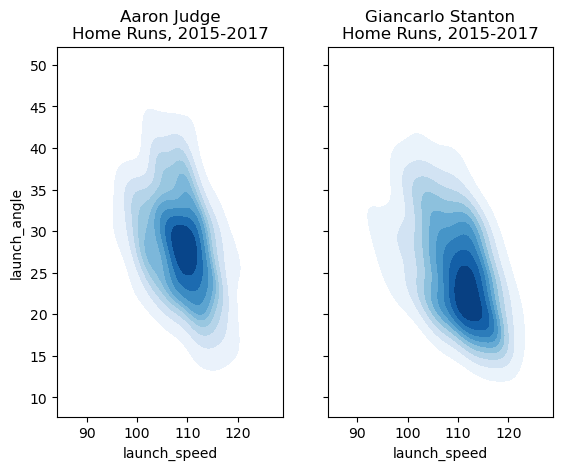

In [4]:
# Filter to include home runs only
judge_hr = judge[judge['events'] == 'home_run']
stanton_hr = stanton[stanton['events'] == 'home_run']

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x=judge_hr['launch_speed'], y=judge_hr['launch_angle'], fit_reg=False, color='tab:blue', data=..., ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x=stanton_hr['launch_speed'], y=stanton_hr['launch_angle'], fit_reg=False, color='tab:blue', data=..., ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(data=judge_hr, x=judge_hr['launch_speed'], y=judge_hr['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(data=stanton_hr, x=stanton_hr['launch_speed'], y=stanton_hr['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

Text(0.5, 1.0, 'Home Runs, 2015-2017')

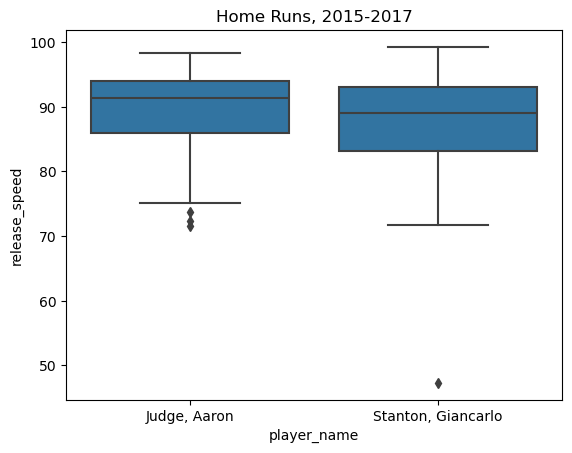

In [5]:
# Combine the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr, stanton_hr])

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(data =judge_stanton_hr, x='player_name', y='release_speed', color='tab:blue').set_title('Home Runs, 2015-2017')

In [6]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]: 
        return 1
        # ... YOUR CODE FOR TASK 6 ...
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
        # ... YOUR CODE FOR TASK 6 ...
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
        # ... YOUR CODE FOR TASK 6 ...

In [7]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1

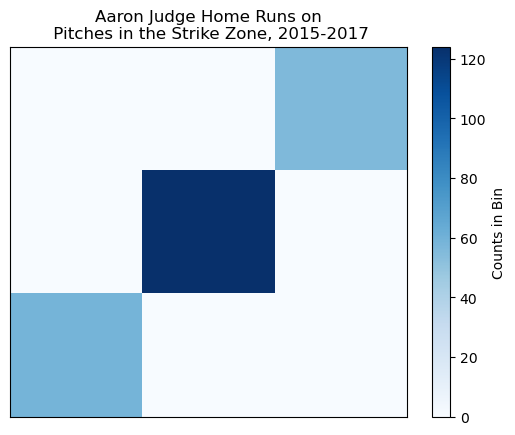

In [8]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'], judge_strike_hr['zone_x'], bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

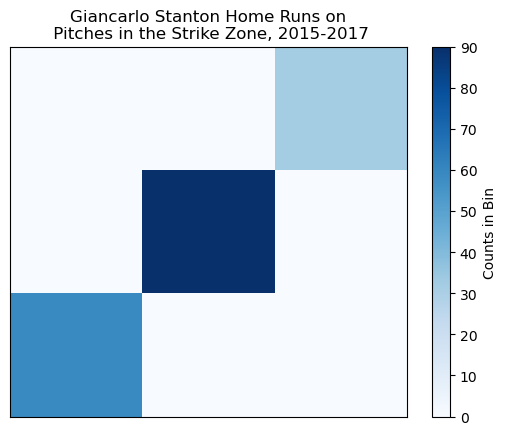

In [9]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)

# Plot Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr['zone_x'], stanton_strike_hr['zone_x'], bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')